In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt, exp, factorial

## Introduction

This page follows page 290 to 297 in *Physical Chemistry, 8th Ed.* by Peter Atkins and Julio de Paula. This section of the text deals with quantum harmonic oscillators. Here, I will define a class that models the quantum harmonic oscialltor and test it on examples in the text.

## Define a class for the harmonic oscillator

In [2]:
class QuantumHarmonicOscillator:
    """
    This models a harmonic oscillator. Parameters used throughout the methods
    are:
    
    nu: The level of the harmonic oscillator
    k: The force constant
    m: The mass
    
    The nomenclature of variable names follows Atkins and de Paula Physical
    Chemistry 8th ed.
    """
    
    def __init__(self, mass, k):
        """
        Setup the values used by all methods in this model.
        
        Parameters
        ----------
        mass: float
            The reduced mass of the system, in kg
        
        k: float
            The force constant, in N/m
        """
        self.hbar = 1.054571817e-34
        self.k = k
        self.mass = mass
        self.omega = sqrt(k / mass)
    
    def hermite(self, nu, gamma):
        """
        Returns the value of the nu-th (nth) Hermite polynomial evaluated on gamma
        
        The nu and gamma notation follows Atkins' Physical Chemistry 8th ed.
        
        Parameters
        ----------
        nu: int
            The nu-th (nth) Hermite polynomial
            
        gamma: float
            The value to calculate with the Hermite polynomial
            
        Returns
        -------
        float
            The value of the nu-th Hermite polynomial evaluated with gamma.
            
        Raises
        ------
        Exception
            Raises an exception if the nth Hermite polynomial is not
            supported.
        """
        if nu == 0:
            return 1
        elif nu == 1:
            return 2 * gamma
        elif nu == 2:
            return 4 * gamma ** 2 - 2
        elif nu == 3:
            return 8 * gamma ** 3 - 12 * gamma
        elif nu == 4:
            return 16 * gamma ** 4 - 48 * gamma ** 2 + 12
        elif nu == 5:
            return 32 * gamma ** 5 - 160 * gamma ** 3 + 120 * gamma
        elif nu == 6:
            return 64 * gamma ** 6 - 480 * gamma ** 4 + 720 * gamma ** 2 - 120
        else:
            raise Exception(f'Hermite polynomial {n} is not supported')
            
    def max_nu(self):
        """
        Returns
        -------
        int
            The maximum nu value for the instance.
        """
        return 6
    
    def energy(self, nu):
        """
        Calculate the energy at the given level nu of the system
        
        Parameters
        ----------
        nu: int
            The quantum number nu for the energy level of this system
            
        Returns
        -------
        float
            Energy of the system in Joules.
        """
        return (nu + 0.5) * self.hbar * self.omega
    
    def energy_sepration(self):
        """
        Returns
        -------
        float
            The energy difference between adjacent energy levels in Joules.
        """
        return self.hbar * self.omega
    
    def wavefunction(self, nu, x):
        """
        Returns the value of the wavefunction at energy level nu
        at coordinate x.
        
        Parameters
        ----------
        nu: float
            Energy level of the system.
            
        x: float
            x coordinate of the particle in m.
            
        Returns
        -------
        float
            Value of the wavefunction nu at x.
        """
        alpha = (self.hbar ** 2 / self.mass / self.k) ** 0.25
        gamma = x / alpha
        normalization = sqrt(1 / (alpha * sqrt(pi) * 2 ** nu * factorial(nu)))
        gaussian = exp((-gamma ** 2) / 2)
        hermite = self.hermite(nu, gamma)
        return normalization * hermite * gaussian
    
    def wavefunction_across_range(self, nu, x_min, x_max, points=100):
        """
        Calculates the wavefunction across a range.
        
        Parameters
        ----------
        nu: int
            The quantum number of the system.
            
        x_min: float
            The minimum x value to calculate.
            
        x_max: float
            The maximum x value to calculate.
            
        points: int
            The number of points across the range
            
        Returns
        -------
        np.array, list
            The first array are the x coordinates, the second list are the
            float values of the wavefunction.
        """
        xs = np.linspace(x_min, x_max, points)
        ys = [self.wavefunction(nu, x) for x in xs]
        return xs, ys
    
    def prob_density(self, nu, x_min, x_max, points=100):
        """
        Returns the probability density between x_min and x_max for a given
        number of points at energy level nu.
        
        Parameters
        ----------
        nu: int
            Quantum number of the system.
            
        x_min: float
            Minimum of length being calculated. Probably negative. Units are
            meters.
            
        x_max: float
            Maximum of length being calculated. Probably positive. Units are
            meters.
            
        points: int
            The number of points to compute the probability density for
            
        Returns
        -------
        np.array, list
            The first array is the list of x coordinates. The list are the
            corresponding values of the probability density.
        """
        xs = np.linspace(x_min, x_max, points)
        ys = [self.wavefunction(nu, x) ** 2 for x in xs]
        return xs, ys

## Test the class with <sup>1</sup>H<sup>35</sup>Cl Properties

The <sup>1</sup>H<sup>35</sup>Cl molecule has a bond with the following physical properties (the mass is of the proton in Hydrogen).

$$ k = 516.3 N/m $$

$$ m = 1.7 \times 10^{-27} kg $$


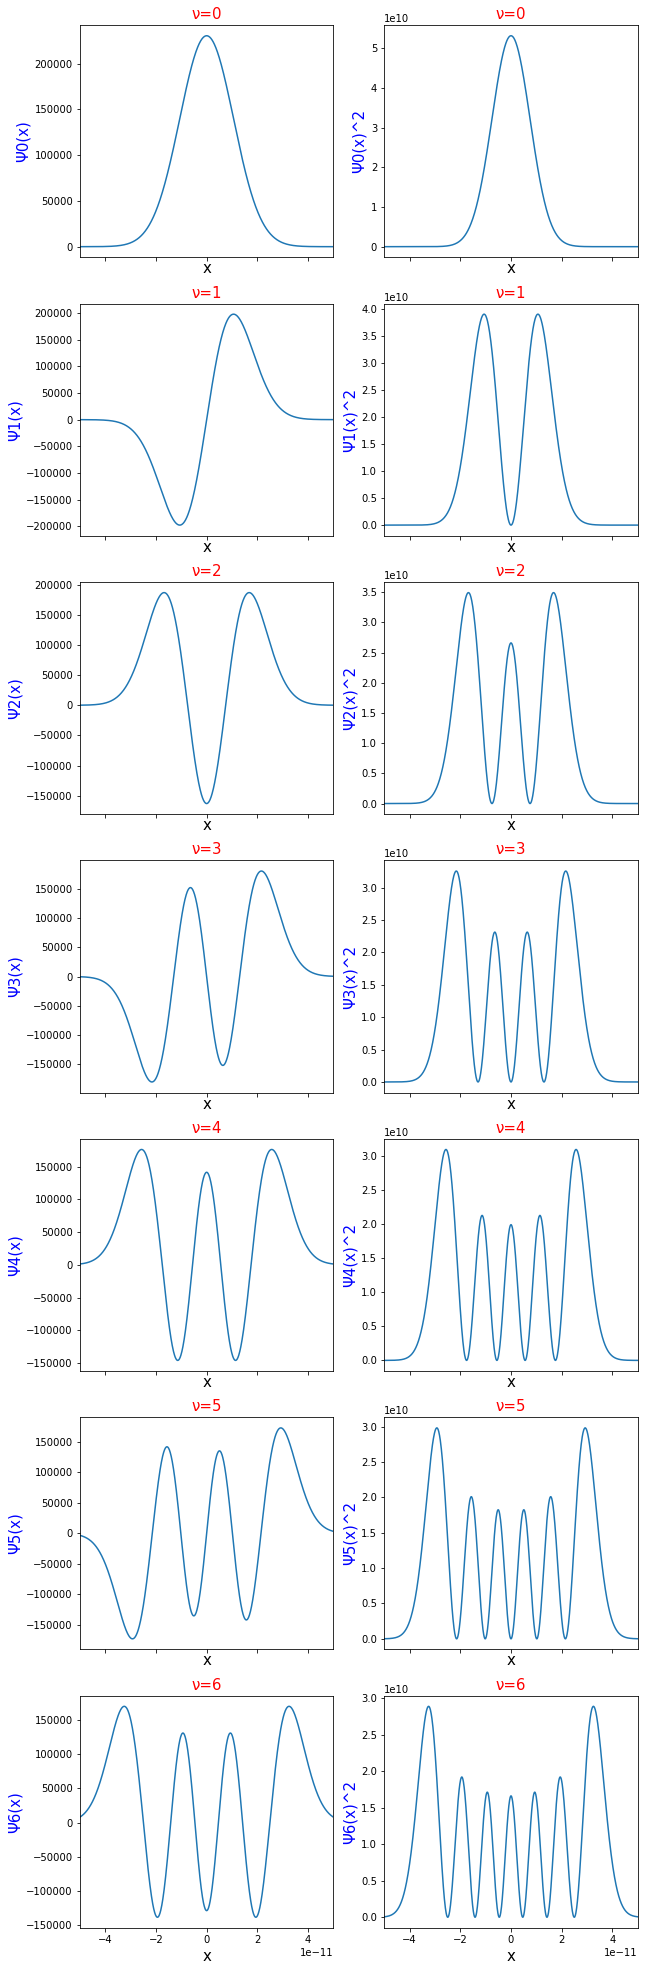

In [13]:
k = 516.3
mass = 1.7e-27
x_min = -0.5e-10
x_max = 0.5e-10
points = 1000
qho = QuantumHarmonicOscillator(k=k, mass=mass)
nus = range(qho.max_nu() + 1)
fig, axs = plt.subplots(nrows=len(nus), ncols=2, figsize=(10, len(nus) * 5), sharex=True)
for idx, nu in enumerate(nus):
    xs_wavefunction, ys_wavefunction = qho.wavefunction_across_range(nu, x_min, x_max, points)
    xs_prob_density, ys_prob_density = qho.prob_density(nu, x_min, x_max, points)
    axs[nu, 0].set_title(f'ν={nu}', size=15, color='r')
    axs[nu, 0].set_ylabel(f'Ψ{nu}(x)', size=15, color='b')
    axs[nu, 0].set_xlabel('x', size=15)
    axs[nu, 0].set_xlim(x_min, x_max)
    axs[nu, 1].set_title(f'ν={nu}', size=15, color='r')
    axs[nu, 1].set_ylabel(f'Ψ{nu}(x)^2', size=15, color='b')
    axs[nu, 1].set_xlabel('x', size=15)
    axs[nu, 1].set_xlim(x_min, x_max)
    axs[nu, 0].plot(xs_wavefunction, ys_wavefunction)
    axs[nu, 1].plot(xs_prob_density, ys_prob_density)